# ISIS

_Dataset from: https://www.kaggle.com/fifthtribe/how-isis-uses-twitter_

---

## Part Two : Models

Unique tweets were sampled from the dataset and manually labelled. 
Label categories:
- **N** - News. Informative, reportive in nature with statements on curent events or links to news. 
- **P** - Propaganda. Links to ISIS news sources, or biased links. 
- **O** - Opinion. Containing personal thoughts. Religious quotes were placed here as well as they constitute religious opinion. 

In [17]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
import datetime

import re
# import textblob
from langdetect import detect

from collections import Counter

%matplotlib inline
style.use('fivethirtyeight')

In [3]:
labelled_csv = 'uniquetweets.csv'
labelled_tweets = pd.read_csv(labelled_csv)

In [4]:
labelled_tweets.head()

,Unnamed: 0,name,username,description,location,followers,numberstatuses,time,tweets,Label,url,lang,mentions,hashtags
0,951,abdlrhmn,abdlrhmn15,Do And Die only for ISLAM,NaN,24,144,6/1/2016 6:00,RT :,NaN,['https://t.co/KoHqc9bpEL'],en,['@freeOurSisters1'],[]
1,925,Mohamed Naseem,NaseemAhmed50,"Journalist ,Seeking and spreading the truth.",Male'. Maldives.,2121,4992,4/1/2016 18:00,RT : You missed a prayer. 💔,NaN,['https://t.co/UYSvByCDBi'],en,['@SheikhQuotes'],[]
2,2043,Al-Battar English,Al_Battar_Engl,NaN,NaN,117,144,30/1/2016 20:00,#IslamicState\r\n#WilayatAlKhyar\r\nImages of ...,P,['https://t.co/sVS9Vxwjtt'],en,[],"['#IslamicState', '#WilayatAlKhyar', '#Martydo..."
3,1266,Asim Abu Merjem,AsimAbuMerjem,"Servant of Allah, in need of Allah's mercy !!!",NaN,742,348,17/1/2016 22:00,"Massive TACTICAL RETREAT of ""brave"" SAA soldi...",O,[],en,['@leithfadel'],[]
4,1855,Marwan Qassami,QassamiMarwan,"Humanitarian, social entrepreneur, Independent...","Antas, Bahia",1593,908,29/1/2016 18:00,Western secular humanist values:\r\n,O,['https://t.co/IMfvB8ZDqd'],en,[],[]


In [5]:
labelled_tweets.drop(['Unnamed: 0'], axis=1, inplace=True)
labelled_tweets = labelled_tweets[~labelled_tweets['Label'].isnull()]

In [5]:
hashtag = []
for tweet in labelled_tweets['tweets']:
    try:
        hashtag.append(re.findall('#\w+', tweet))
    except: 
        hashtag.append(None)

In [6]:
labelled_tweets['hashtags'] = hashtag

In [7]:
len(labelled_tweets)

258

The dataset looks pretty balanced, not much difference in count between the different Labels.

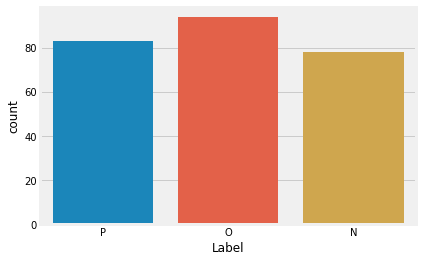

In [5]:
sns.countplot(labelled_tweets['Label'])

Baseline accuracy as calculated from the largest class. 

In [8]:
# baseline accuracy from majority class.

labelled_tweets['Label'].value_counts()['O'] / float(len(labelled_tweets))

0.36862745098039218

---
### Train/test split

Later, analyze only the training set.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = labelled_tweets.drop(['Label'], axis=1)

In [8]:
y = labelled_tweets['Label']

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2018)

In [10]:
labelled_tweets[labelled_tweets['Label']=='P']

,name,username,description,location,followers,numberstatuses,time,tweets,Label,url,lang,mentions,hashtags
2,Al-Battar English,Al_Battar_Engl,NaN,NaN,117,144,30/1/2016 20:00,#IslamicState\r\n#WilayatAlKhyar\r\nImages of ...,P,['https://t.co/sVS9Vxwjtt'],en,[],"['#IslamicState', '#WilayatAlKhyar', '#Martydo..."
6,War Reporter,warreporter2,"Reporting, analysing and discussing conflicts ...","München, Deutschland",139,656,14/1/2016 12:00,RT : #Syria path of Tawheed - from the officia...,P,[],en,['@thevictoryseri4'],['#Syria']
10,s.o.dawlah,1Dawlah_III,NaN,NaN,632,333,19/1/2016 4:00,#WilayatSayna \r\nCaliphate soldiers execute t...,P,"['https://t.co/SN4PumUNEA', 'https://t.co/mUmJ...",en,[],['#WilayatSayna']
19,s.o.dawlah,1Dawlah_III,NaN,NaN,632,333,19/1/2016 23:00,#WilayatHalab \r\n❄ Winter in the town of Akht...,P,"['https://t.co/ScuiR9vKRW', 'https://t.co/qT82...",en,[],['#WilayatHalab']
20,Al-Battar English,Al_Battar_Engl,NaN,NaN,117,144,29/1/2016 15:00,#AmaqNewsAgency Approximately 50 Syrian Regime...,P,[],en,[],"['#AmaqNewsAgency', '#Kuwayris']"
21,Plea Of the Ummah!,pleaoftheummah,Plea of the Ummah!\r\nUmmathuge Aadheys!\r\nA ...,NaN,95,1111,17/4/2016 4:00,󾓯 | Legitimacy (Shar'ia) courses for the Musl...,P,['https://t.co/MeVXdhNJsb'],en,[],"['#Sirte', '#IslamicState', '#WilayatTarabulus']"
22,s.o.dawlah,1Dawlah_III,NaN,NaN,632,333,22/1/2016 22:00,#AmaqNewsAgency \r\n⚡ Public Services Diwan la...,P,['https://t.co/srioXwYKaS'],en,[],['#AmaqNewsAgency']
29,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,22/1/2016 9:00,Sheikh Faisal talks about #ISIS AQ &amp; Murta...,P,['https://t.co/pSWAD6tg2U'],en,[],['#ISIS']
38,Al-Battar English,Al_Battar_Engl,NaN,NaN,117,144,30/1/2016 11:00,#Caliphate_News\r\n#WilayatHalab\r\nCubs &amp;...,P,"['https://t.co/6wSDHhnaOD', 'https://t.co/qTFT...",en,[],"['#Caliphate_News', '#WilayatHalab']"
46,war analysis,war_analysis,NaN,NaN,89,1662,12/4/2016 20:00,RT : Trained German soldiers joining IS.,P,['https://t.co/f3j725dSMD'],en,['@SultanbinBajad'],[]


---
### Construct a dictionary of top hashtags to vectorize the tweets


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

The function below retrieves strings from a nested list, and removes empty lists. 

In [12]:
def flatten_string(user_list):
    return[user.replace(' ','') for y in user_list if y for user in y]

In [15]:
hashtags = [hashtag for hashtag in labelled_tweets['hashtags'] if hashtag]
all_hashtags = flatten_string(hashtags)
hashcount = pd.Series(Counter(all_hashtags))

In [16]:
# eventually, #ISIS, #IS, and #IslamicState hashtags should be merged.
tophashcount = hashcount.sort_values(ascending=False).head(15)
tophashcount.index

Index(['#ISIS', '#IS', '#IslamicState', '#Syria', '#Caliphate_News', '#Iraq',
       '#Ramadi', '#DeirEzzor', '#Assad', '#WilayatHalab', '#Aleppo',
       '#AmaqNewsAgency', '#Sinai', '#Anbar', '#WilayatNinawa'],
      dtype='object')

In [15]:
# note that for countvectorizer to work here, the tweets['hashtag'] column has to be an entire string, without being
# parsed by the flatten_string function.

countvec = CountVectorizer(lowercase=True)
cv_matrix = countvec.fit_transform(Xtrain['hashtags'])

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ytraindf = pd.DataFrame({'Labels': ytrain})

ytraindf['News'] = [1 if tweet=='N' else 0 for tweet in ytrain]
ytraindf['Opinion'] = [1 if tweet=='O' else 0 for tweet in ytrain]

select = SelectKBest(chi2, k=3)
select.fit(cv_matrix, ytraindf.drop(['Labels'], axis=1))

SelectKBest(k=3, score_func=<function chi2 at 0x000002AF5A94DA60>)

In [19]:
# column numbers in cv_matrix - top 3 hashtags for predicting Labels based on chi2
hash_cols = select.get_support().nonzero()
for i in hash_cols[0]: 
    print (countvec.get_feature_names()[i])

anbar
assad
isis


In [20]:
cv_subset = cv_matrix[:,hash_cols[0]]

In [21]:
hash_cols[0]

array([ 8, 10, 45], dtype=int64)

In [22]:
besthash = [countvec.get_feature_names()[i] for i in hash_cols[0]]

tophashdf = pd.DataFrame(cv_subset.A, 
                         columns=besthash,
                         index=Xtrain.index)
tophashdf.head()

,anbar,assad,isis
73,0,0,0
91,0,0,0
69,0,0,0
57,0,0,0
195,0,0,1


In [23]:
countvec = CountVectorizer(lowercase=True, vocabulary=iter(besthash))
cv_test_matrix = countvec.fit_transform(Xtest['hashtags'])

tophashdf_test = pd.DataFrame(cv_test_matrix.A,
                             columns=besthash,
                             index=Xtest.index)

#### Adding more features related to ISIS propaganda

Amaq News Agency is a news outlet linked with ISIS. '#amaqnewsagency', '#amaq' or '#amaqnews' would then be relevant hashtags in indicating if there is a tweet with intention of spreading propaganda. This is known and definitely generalizable - it should be included as a feature regardless of what chi2 says.

In [20]:
hashlist = ['#amaq', '#caliphate_news']
def custom_hash(hashlist, X):
    return [1 if any(hashtag in hashtags.lower() for hashtag in hashlist) else 0 for hashtags in X]

In [22]:
Xtrain['amaq_mention'] = custom_hash(hashlist, Xtrain['hashtags'])
Xtest['amaq_mention'] = custom_hash(hashlist, Xtest['hashtags'])

Additionally, we also know that territorial claims made by ISIS are called 'wilayat'. A search on jihadology.net, a website by Aaron Zelin, a Washington researcher on jihadi groups, turns up many ISIS videos with the typical title starting with 'Wilayat-Al-' followed by an Arabic phrase. Hence, hashtags containing 'wilayat' in this context could be indicative of propaganda.

In [24]:
hashlist2 = ['wilayat']

Xtrain['wilayat_mention'] = custom_hash(hashlist2, Xtrain['hashtags'])
Xtest['wilayat_mention'] = custom_hash(hashlist2, Xtest['hashtags'])

---
### POS Tagging 

Tease out difference in syntactic structure between opinions, news, and propaganda. 

In [25]:
import spacy
nlp = spacy.load('en')

In [26]:
# consolidated list of tags for each tweet
def all_tags(col):
    return [[word.pos_ for word in nlp(tweet)] for tweet in col]

In [28]:
Xtrain['POStags'] = all_tags(Xtrain['tweets'])
Xtest['POStags'] = all_tags(Xtest['tweets'])

In [27]:
Xtrain

,name,username,description,location,followers,numberstatuses,time,tweets,url,lang,mentions,hashtags,amaq_mention,wilayat_mention,POStags
73,War BreakingNews,warrnews,we provide fresh news from every battlefield,world,7152,5929,30/1/2016 19:00,Reports #IS has taken control of the Faculty o...,['https://t.co/V9C3fdd7W2'],en,[],['#IS'],0,0,"[NOUN, NOUN, VERB, VERB, VERB, NOUN, ADP, DET,..."
91,IS_BAQIYA,BaqiyaIs,NaN,NaN,25,471,3/9/2015 13:00,Ali Mohammad Beqaaey died. Second Syrian refug...,[],en,[],[],0,0,"[PROPN, PROPN, PROPN, VERB, PUNCT, ADJ, ADJ, N..."
69,al-Nusra,al_nusra,NaN,NaN,350,190,3/11/2015 1:00,"Aleppo | The arrival of 23 Mujahid of the ""Jun...",[],en,[],"['#Manbej', '#IS']",0,0,"[PROPN, NOUN, DET, NOUN, ADP, NUM, PROPN, ADP,..."
57,abdlrhmn,abdlrhmn15,Do And Die only for ISLAM,NaN,24,144,29/12/2015 7:00,RT : Assad killed nearly half million people b...,[],en,['@lion_faisal'],"['#SmallCoffinsAreHeaviest', '#PrayForSyria']",0,0,"[NOUN, PUNCT, PROPN, VERB, ADV, ADJ, NUM, NOUN..."
195,Abu Humayra,abuhumayra4,‏إِنَّ صَلَاتِي وَنُسُكِي وَمَحْيَايَ وَمَمَات...,Among The Muslims,193,103,30/1/2016 16:00,RT : #IS Syrian soldiers conducted 2 istishhad...,[],en,['@apb_is'],"['#IS', '#SAA', '#DeirEzzor', '#ISIS']",0,0,"[NOUN, PUNCT, NOUN, VERB, ADJ, NOUN, VERB, NUM..."
165,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,5/1/2016 22:00,RT : The Islamic State are working on driverle...,"['https://t.co/GI8QBUQMGW', 'https://t.co/xgkC...",en,['@SkyNews'],[],0,0,"[NOUN, PUNCT, DET, ADJ, PROPN, VERB, VERB, ADP..."
311,General,ismailmahsud,"Listen! No affiliations, Final year research o...",S.Wazirstan|Mahsud not a Wazir,392,743,29/1/2016 17:00,may be you westerner social intelligence guy....,[],en,['@RamiAlLolah'],[],0,0,"[SPACE, VERB, VERB, PRON, ADJ, ADJ, NOUN, NOUN..."
148,General,ismailmahsud,"Listen! No affiliations, Final year research o...",S.Wazirstan|Mahsud not a Wazir,392,743,25/1/2016 18:00,Hey and plz turn to true christianity at lea...,['https://t.co/EFY4HxG7g4'],en,"['@BarackObama', '@realDonaldTrump']",[],0,0,"[INTJ, SPACE, CCONJ, SPACE, NOUN, NOUN, ADP, A..."
40,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,9/1/2016 13:00,3/3... He causes to inherit it whom He wills o...,['https://t.co/FAUULnCD7h'],en,[],[],0,0,"[NUM, PUNCT, PRON, VERB, PART, VERB, PRON, NOU..."
149,٩ Flames of Haqq,Witness_alHaqq,NaN,NaN,605,115,29/1/2016 18:00,RT : Retweeted Cairo Review ():\r\n\r\nRead 's...,[],en,"['@abdelbariatwan', '@CairoReview', '@abdelbar...",[],0,0,"[NOUN, PUNCT, PROPN, PROPN, PROPN, PUNCT, PUNC..."


In [29]:
# function adds number of tags in tweet to a list
from collections import Counter

def add_tag(tag,df_col):    
    return [Counter(x)[tag] for x in df_col]

In [31]:
Xtrain['propn_count'] = add_tag('PROPN', Xtrain['POStags'])
Xtrain['noun_count'] = add_tag('NOUN', Xtrain['POStags'])
Xtrain['verb_count'] = add_tag('VERB', Xtrain['POStags'])
Xtrain['adj_count'] = add_tag('ADJ', Xtrain['POStags'])
Xtrain['adv_count'] = add_tag('ADV', Xtrain['POStags'])
Xtrain['pron_count'] = add_tag('PRON', Xtrain['POStags'])

Xtest['propn_count'] = add_tag('PROPN', Xtest['POStags'])
Xtest['noun_count'] = add_tag('NOUN', Xtest['POStags'])
Xtest['verb_count'] = add_tag('VERB', Xtest['POStags'])
Xtest['adj_count'] = add_tag('ADJ', Xtest['POStags'])
Xtest['adv_count'] = add_tag('ADV', Xtest['POStags'])
Xtest['pron_count'] = add_tag('PRON', Xtest['POStags'])

Next, use a chi2 squared test to choose 3 best features. My guess is that pronouns (I, you, he, she, themselves) are closely associated with opinions. I also noticed that the sentence structures between propaganda seem to be similar to that of news - attacks events by ISIS are reported matter-of-factly in a tone similar to news headlines. Hence, this might not be as useful for distinguishing between propaganda and news. Let's see what chi2 returns us.

In [24]:
Xpos = Xtrain[['propn_count','noun_count','verb_count','adj_count','adv_count','pron_count']]
Xpos_test = Xtest[['propn_count','noun_count','verb_count','adj_count','adv_count','pron_count']]

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select = SelectKBest(chi2, k=3)
select.fit(Xpos, ytrain)

SelectKBest(k=3, score_func=<function chi2 at 0x000001A682FB46A8>)

In [34]:
# features selected that are most predictive of the tweet category.

besttags = select.get_support().nonzero()[0]

Xpos.iloc[:,besttags].head()

,propn_count,adv_count,pron_count
73,7,0,0
91,4,0,0
69,7,0,0
57,2,1,1
195,6,0,0


---
### First Model - Naives Bayes Classifier

In [25]:
from sklearn.naive_bayes import MultinomialNB

Xtrain_features = pd.concat([Xpos,
                             tophashdf,
                             Xtrain.loc[:,['amaq_mention','wilayat_mention']]],axis=1)
Xtest_features = pd.concat([Xpos_test,
                            tophashdf_test,
                            Xtest.loc[:,['amaq_mention','wilayat_mention']]],axis=1)


mnb = MultinomialNB()
model = mnb.fit(Xtrain_features, ytrain)

In [46]:
y_pred = mnb.predict(Xtest_features)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          N       0.54      0.30      0.39        23
          O       0.73      0.79      0.76        28
          P       0.53      0.69      0.60        26

avg / total       0.61      0.61      0.59        77



In [40]:
# gridsearched with range of C values (best one below) However, the results did not improve by much. 
# results were also marginally better when more features were included.

model.best_params_

{'alpha': 0.1}

A support vector classifier was built too. Results for opinion was better (70% precision and 80% recall) but not for news and propaganda. This could mean that it is harder to find a clear decision boundary between these 2 classes.

### Second Model: Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=2018)

C = [1,5,10]
mc = ['multinomial','ovr']
solver = ['newton-cg','lbfgs']
param_grid = dict(class_weight=[None], C=C, multi_class=mc, solver=solver)

grid = GridSearchCV(lr, param_grid, cv=3)

In [124]:
model = grid.fit(Xtrain_features, ytrain)

In [125]:
y_pred = model.predict(Xtest_features)

In [126]:
print (classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          N       0.44      0.17      0.25        23
          O       0.67      0.86      0.75        28
          P       0.53      0.65      0.59        26

avg / total       0.55      0.58      0.55        77



In [127]:
model.best_params_

{'C': 1, 'class_weight': None, 'multi_class': 'ovr', 'solver': 'newton-cg'}

### Third model: Random Forest

An ensemble of decision trees

In [155]:
# Xpos.iloc[:,select.get_support().nonzero()[0]]
Xtrain_features = pd.concat([Xpos.iloc[:,select.get_support().nonzero()[0]],
                             tophashdf,
                             Xtrain.loc[:,['amaq_mention','wilayat_mention']]],axis=1)
Xtest_features = pd.concat([Xpos_test.iloc[:,select.get_support().nonzero()[0]],
                            tophashdf_test,
                            Xtest.loc[:,['amaq_mention','wilayat_mention']]],axis=1)

In [159]:
from sklearn.ensemble import RandomForestClassifier

n_est = [3,5,7]
depth = [None, 3,5,7]
param_grid = dict(n_estimators=n_est, max_depth=depth)

rfc = RandomForestClassifier(random_state=2018)

grid = GridSearchCV(rfc, param_grid)
model = grid.fit(Xtrain_features, ytrain)
y_pred = model.predict(Xtest_features)

In [160]:
model.best_params_

{'max_depth': None, 'n_estimators': 3}

In [161]:
print (classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          N       0.57      0.52      0.55        23
          O       0.74      0.71      0.73        28
          P       0.59      0.65      0.62        26

avg / total       0.64      0.64      0.64        77



For Random Forest, scores were significantly better when number of features were reduced to those filtered after chi2. This makes sense as it the decision trees would be prone to overfit.

### Voting Classifier (ensemble)

A bagging ensemble - logistic regression, naive bayes, and random forest. 

In [190]:
Xtrain_features = pd.concat([Xpos,
                             tophashdf,
                             Xtrain.loc[:,['amaq_mention','wilayat_mention']]],axis=1)
Xtest_features = pd.concat([Xpos_test,
                            tophashdf_test,
                            Xtest.loc[:,['amaq_mention','wilayat_mention']]],axis=1)

In [191]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

mnb = MultinomialNB()
svc = SVC(class_weight='balanced', C=5, kernel='linear', random_state=2018)
rfc = RandomForestClassifier(n_estimators=3, max_depth=None, random_state=2018)

vc = VotingClassifier(estimators = [('mnb',mnb), ('svc',svc), ('rfc',rfc)],
                     voting='hard',
                     weights=[1,1,2])

In [192]:
model = vc.fit(Xtrain_features, ytrain)
y_pred = model.predict(Xtest_features)

In [193]:
print (classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          N       0.41      0.39      0.40        23
          O       0.66      0.82      0.73        28
          P       0.60      0.46      0.52        26

avg / total       0.56      0.57      0.56        77



For this voting classifier, results (for News and Propaganda in particular) did not improve. Generally, this means that models were bad at classifying the same instances. The variance in each model was not compensated for. 

---
### Model 4: XGBoost

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [26]:
xgb = XGBClassifier()
model = xgb.fit(Xtrain_features, ytrain)
y_pred = model.predict(Xtest_features)
print (classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          N       0.55      0.48      0.51        23
          O       0.79      0.82      0.81        28
          P       0.57      0.62      0.59        26

avg / total       0.65      0.65      0.65        77



In [44]:
learning_rate= np.linspace(0.005,0.05,5)
colsample_bytree= np.linspace(0.15, 0.5,5)
subsample = np.linspace(0.2,0.5, 5)
max_depth = np.linspace(2,6,5, dtype=int)
gamma = np.linspace(0,10,5)
min_child_weight = np.linspace(1,5,5)


param_grid = dict(learning_rate=learning_rate,colsample_bytree=colsample_bytree,subsample=subsample, \
                 max_depth=max_depth, gamma=gamma, min_child_weight=min_child_weight)

xgb = XGBClassifier()
grid = GridSearchCV(xgb, param_grid, cv=3, n_jobs=4)


model = grid.fit(Xtrain_features, ytrain)
y_pred = model.predict(Xtest_features)
print (classification_report(ytest, y_pred))

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000002AF5C6C92B0>>
Traceback (most recent call last):
  File "C:\Users\cjiahui\Anaconda2\envs\python3\lib\site-packages\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


             precision    recall  f1-score   support

          N       0.43      0.13      0.20        23
          O       0.61      0.89      0.72        28
          P       0.59      0.65      0.62        26

avg / total       0.55      0.58      0.53        77



In [45]:
model.best_params_

{'colsample_bytree': 0.14999999999999999,
 'gamma': 0.0,
 'learning_rate': 0.016250000000000001,
 'max_depth': 2,
 'min_child_weight': 1.0,
 'subsample': 0.5}

---
### Preserving Pickles
Run code below to save dataframes to pickles. 

In [1]:
import pickle
pickle_out = open('Xtrain','wb')
pickle.dump(Xtrain, pickle_out)
pickle_out.close()

pickle_out1 = open('Xtest','wb')
pickle.dump(Xtest, pickle_out1)
pickle_out1.close()

pickle_out2 = open('ytest','wb')
pickle.dump(ytest, pickle_out2)
pickle_out2.close()

pickle_out3 = open('ytrain','wb')
pickle.dump(ytrain, pickle_out3)
pickle_out3.close()


NameError: name 'Xtrain' is not defined

In [ ]:
pickle_uniq = open('tweets_uniq','wb')
pickle.dump(tweets_uniq, pickle_uniq)
pickle_uniq.close()

In [ ]:
pickle_el = open('edgelist','wb') # tweets_date is the pickle file's name.
pickle.dump(edgelist, pickle_el)
pickle_el.close()

pickle_date = open('nodelist','wb') # tweets_date is the pickle file's name.
pickle.dump(nodelist, pickle_date)
pickle_date.close()

### Extracting pickles
Run code below to retrieve saved pickles.

In [6]:
pickle_in1 = open('Xtrain','rb')
Xtrain = pickle.load(pickle_in1)
pickle_in1.close()

pickle_in2 = open('Xtest','rb')
Xtest = pickle.load(pickle_in2)
pickle_in2.close()

pickle_in3 = open('ytest','rb')
ytest = pickle.load(pickle_in3)
pickle_in3.close()

pickle_in4 = open('ytrain','rb')
ytrain = pickle.load(pickle_in4)
pickle_in4.close()


In [10]:
# tweets1 dataframe 

import pickle
pickle_in = open('tweets1','rb')
tweets1 = pickle.load(pickle_in)
pickle_in.close()

# df dataframe for model features

pickle_in = open('df','rb')
df = pickle.load(pickle_in)
pickle_in.close()

# nodelist dataframe

pickle2_in = open('nodelist','rb')
nodelist = pickle.load(pickle2_in)
pickle2_in.close()

# edgelist dataframe

pickle3_in = open('edgelist','rb')
edgelist = pickle.load(pickle3_in)
pickle3_in.close()

In [12]:
Xtrain.columns

Index(['name', 'username', 'description', 'location', 'followers',
       'numberstatuses', 'time', 'tweets', 'url', 'lang', 'mentions',
       'hashtags', 'amaq_mention', 'wilayat_mention', 'POStags', 'propn_count',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count'],
      dtype='object')